Student Name: Gerard Kerley
Student ID: 18195229

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [4]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [5]:
a_x = 0.05
a_y= 10

In [6]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [7]:
print (data.shape)
print (data)

(20, 2)
[[ 0.         -3.66869603]
 [ 1.01014089  0.55768366]
 [ 2.01775979 12.13655293]
 [ 3.00361361 14.78908051]
 [ 4.05067912 19.57149099]
 [ 4.90118914 17.5208936 ]
 [ 5.96204421 21.4175779 ]
 [ 6.87932459 27.28902896]
 [ 7.89421629 28.26636817]
 [ 9.12084266 39.21969278]
 [10.02852877 41.78994717]
 [10.87877405 39.24180819]
 [11.82788565 49.84998235]
 [13.05992345 49.38333707]
 [14.12273523 54.61675523]
 [14.91580764 58.08042406]
 [16.18076084 62.38817627]
 [17.38308581 68.9001086 ]
 [18.41904924 70.15885511]
 [18.87649059 74.82270612]]


### SKLearn PCA
n = 2

In [8]:
pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

[[-0.24526133 -0.969457  ]
 [-0.969457    0.24526133]]


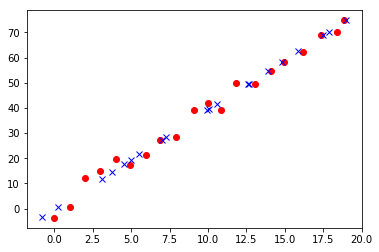

In [9]:
# Reduce dimensions to n = 1
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

# Plot data
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()